In [2]:
import sys
import os
import math
from math import pi
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.fftpack import fft, ifft
from mpl_toolkits.mplot3d import Axes3D


In [23]:
def vecprod(v1,v2):
    c=np.zeros(3)
    c[0]=v1[1]*v2[2]-v1[2]*v2[:][1]
    c[1]=v1[2]*v2[0]-v1[0]*v2[:][2]
    c[2]=v1[0]*v2[1]-v1[1]*v2[:][0]
    return c
def det_frame_fpfc(theta,phi):
    vec2src=np.array([np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)])
    X=vecprod(np.array([0,0,1]),vec2src)
    Y=vecprod(X,vec2src)
    X=X/np.sqrt(sum(X*X))
    Y=Y/np.sqrt(sum(Y*Y))
    det_tensor=np.kron(np.array([1,0,0]).reshape(-1,1),np.array([1,0,0]).reshape(1,-1))-np.kron(np.array([0,1,0]).reshape(-1,1),np.array([0,1,0]).reshape(1,-1))
    fp=0
    fc=0
    wavetensor1=np.kron(X.reshape(-1,1),X)-np.kron(Y.reshape(-1,1),Y)
    wavetensor2=np.kron(X.reshape(-1,1),Y)+np.kron(Y.reshape(-1,1),X)
    fp=np.sum(wavetensor1*det_tensor)
    fc=np.sum(wavetensor2*det_tensor)
    return fp,fc


/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/home/tianyu/.julia/conda/3/envs/few_env/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == "":


(200, 100) (200, 100) (200, 100) (200, 100)


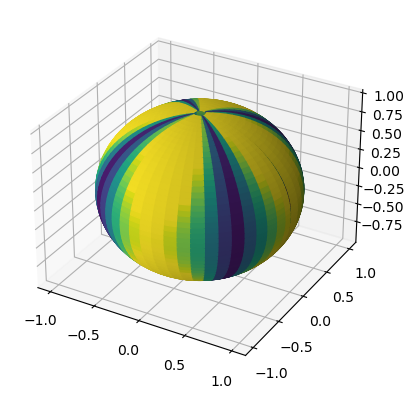

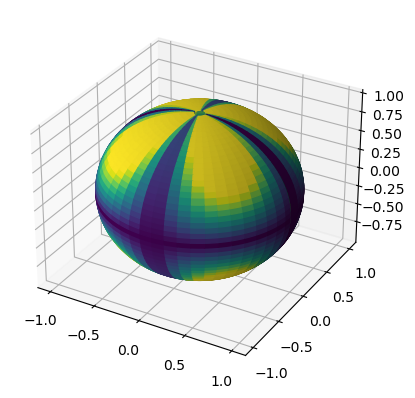

In [36]:
theta=np.arange(0,pi,pi/100)
phi=np.arange(0,2*pi,pi/100)
A,D=np.meshgrid(theta,phi)
X=np.sin(A)*np.cos(D)
Y=np.sin(A)*np.sin(D)
Z=np.cos(A)
fp=np.zeros((len(phi),len(theta)))
fc=np.zeros((len(phi),len(theta)))
for j in range(len(theta)):
    for i in range(len(phi)):
        fp[i][j],fc[i][j]=det_frame_fpfc(theta[j],phi[i])
print(X.shape,Y.shape,Z.shape,fp.shape)
fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
surf=ax.plot_surface(X,Y,Z,facecolors=plt.cm.viridis(np.abs(fp)))
    
plt.show()
fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
surf=ax.plot_surface(X,Y,Z,facecolors=plt.cm.viridis(np.abs(fc)))
    
plt.show()

In [ ]:
det_tensor=np.kron(np.array([1,0,0]).reshape(-1,1),np.array([1,0,0]).reshape(1,-1))

print(det_tensor)

[[1 0 0]
 [0 0 0]
 [0 0 0]]


In [ ]:
theta=np.arange(0,pi,pi/6)
phi=np.linspace(0,2*pi,6)
print(np.column_stack((np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta))))

[[ 0.00000000e+00  0.00000000e+00  1.00000000e+00]
 [ 1.54508497e-01  4.75528258e-01  8.66025404e-01]
 [-7.00629269e-01  5.09036960e-01  5.00000000e-01]
 [-8.09016994e-01 -5.87785252e-01  6.12323400e-17]
 [ 2.67616567e-01 -8.23639104e-01 -5.00000000e-01]
 [ 5.00000000e-01 -1.22464680e-16 -8.66025404e-01]]


In [22]:
import numpy as np

# 创建两个示例矩阵
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# 计算两个矩阵的全缩并
result = np.sum(A * B)

print(result)  # 输出 70


70
